In [ ]:
!pip install umap-learn

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from IPython.display import HTML
from sklearn.decomposition import PCA
from sklearn.feature_selection import f_classif
import umap
from sklearn.manifold import TSNE
import math
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score

rng = np.random.RandomState(0)

In [ ]:
df = pd.read_csv('/content/creditcard_2023.csv')

Drop id as it will not useful information

In [ ]:
df = df.drop(columns=['id']) #drop id column

In [ ]:
df.shape

(568630, 30)

Checking null values and datatype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

Checking infinite value

In [ ]:
df.isin([np.inf, -np.inf]).values.sum()

0

Checking whether data is skewed.

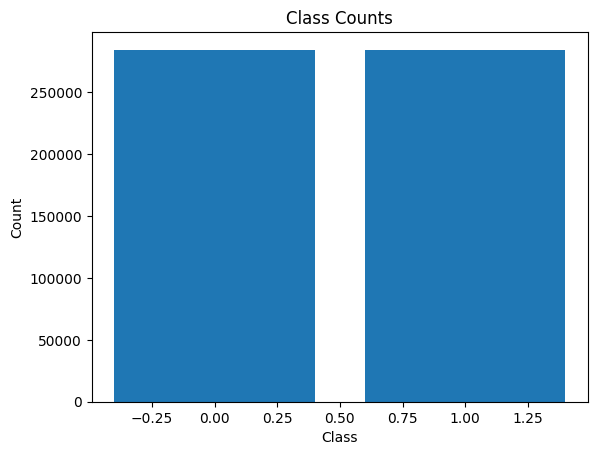

In [ ]:
df2 = df.groupby(['Class'])['Class'].count()
class_counts = df.groupby(['Class'])['Class'].count()

# Plot the counts
plt.bar(class_counts.index, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

Data is well distributed.

Save as X and Y for future usage

In [ ]:
X = df.drop(columns=['Class'])
Y = df.loc[:, ['Class']]

Exploring distribution of the data

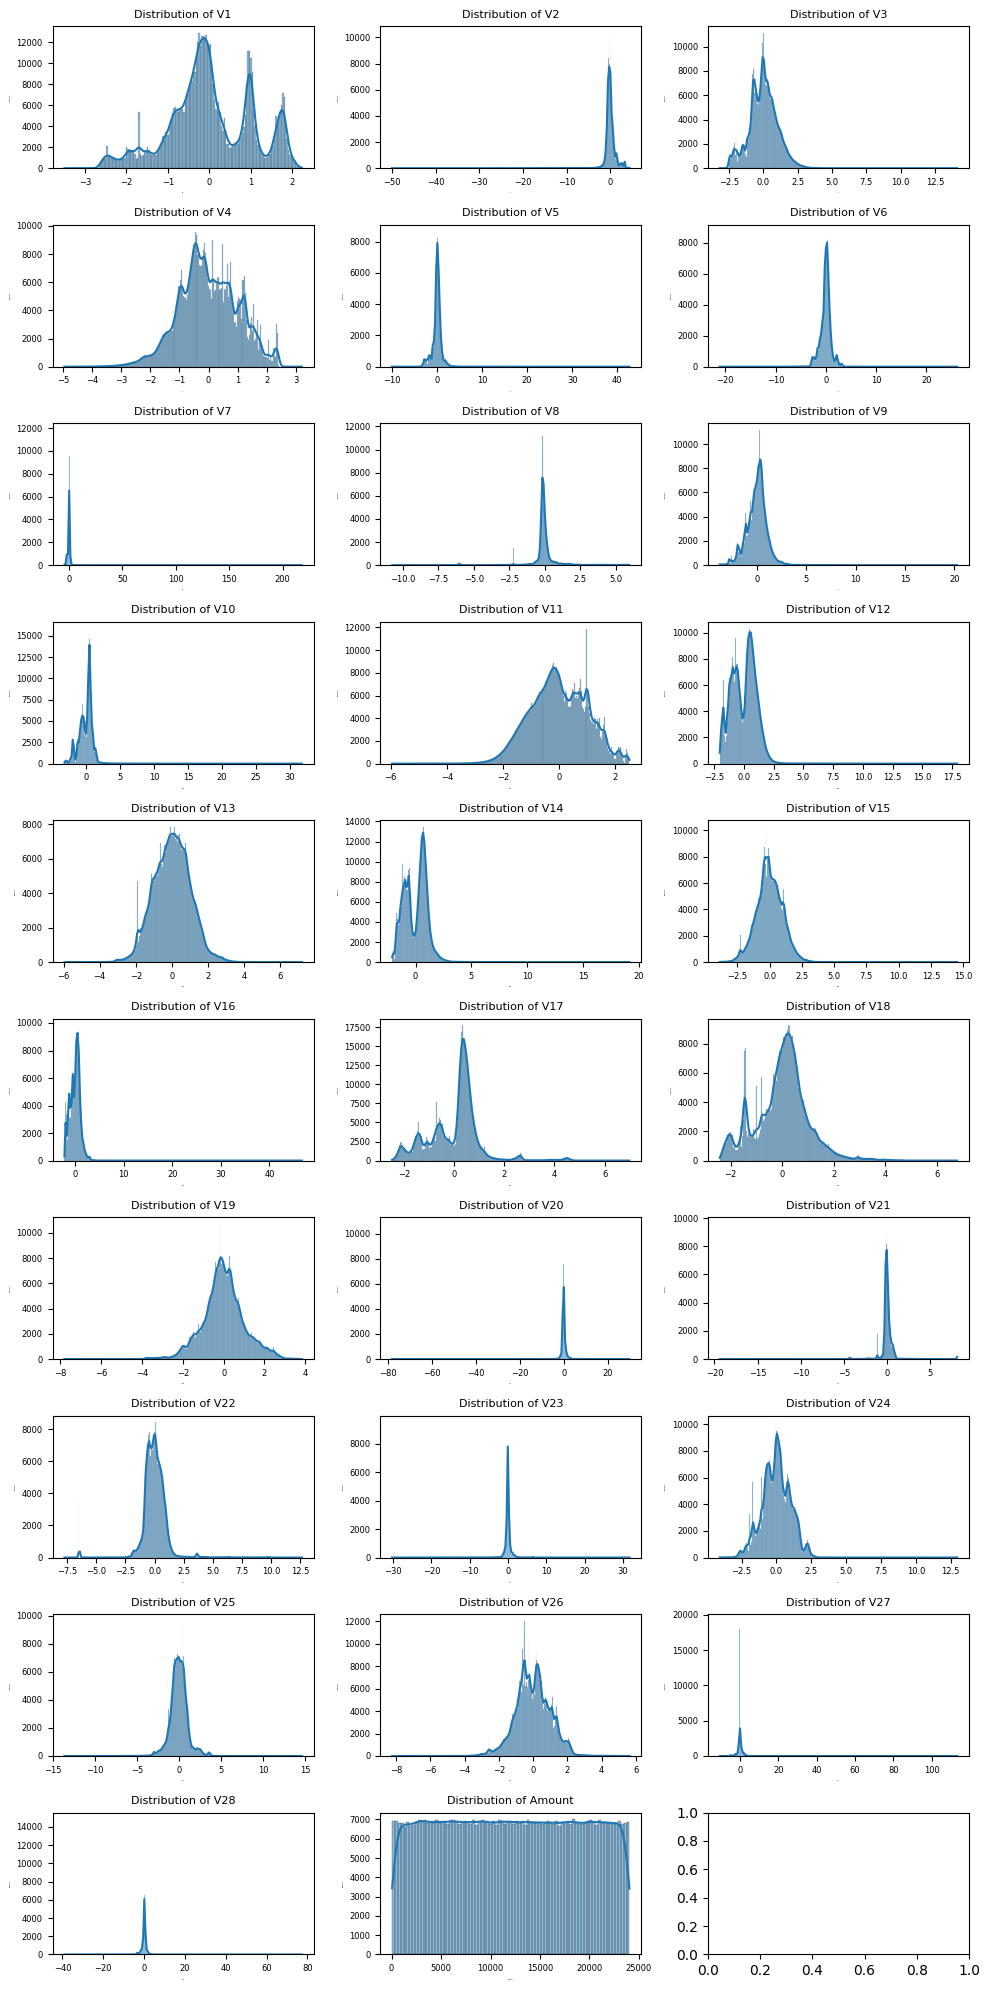

In [ ]:
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(10, 20))

axes = axes.flatten()
for i, column in enumerate(X.columns):
    sns.histplot(X[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}', fontsize=8)
    axes[i].set_xlabel(column, fontsize=0)
    axes[i].set_ylabel('Frequency', fontsize=0)
    axes[i].tick_params(axis='both', labelsize=6)
plt.tight_layout()
plt.show()

Try excluding low variance feature.

Since every columns except for amount is already standardized, we could not find low variance feature

In [ ]:
X.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000


Scale data to see correlation between features

Use minmax standardization for neural network

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X)
scaled_df = pd.DataFrame(scaler.transform(X))
scaled_df.columns=X.columns

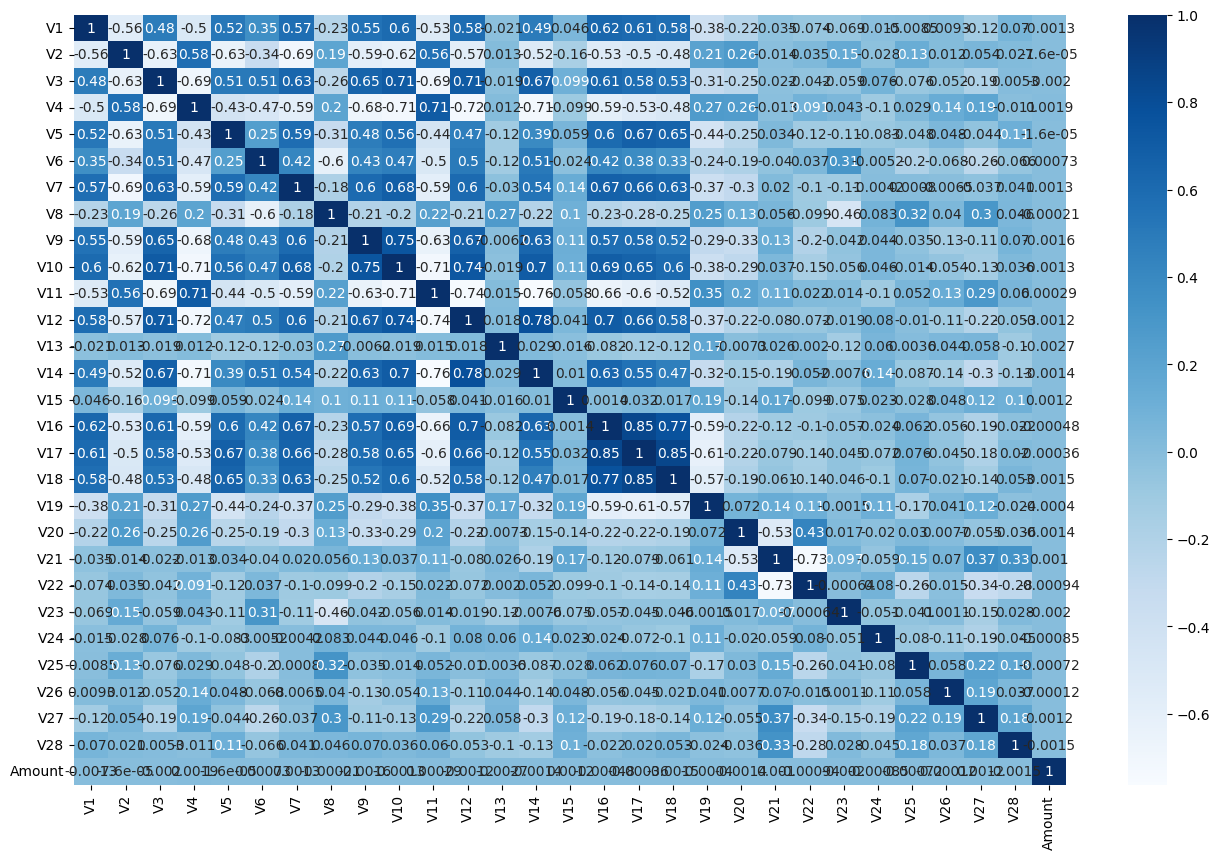

In [ ]:
corr_matrix = scaled_df.corr()
plt.figure(figsize=[16,10])
heatmap = sns.heatmap(corr_matrix,cmap='Blues',annot=True)

V12, V14

V16, V17 and V18 are highly correlated

V9, V10 are highly correlated

Drop highly correlated features

V14, V17, V18 and V10

In [ ]:
scaled_df = scaled_df.drop(columns = ['V14', 'V17', 'V18', 'V10'])

Check correlation with target

In [ ]:
print(scaled_df.corrwith(df['Class']))

V1       -0.505761
V2        0.491878
V3       -0.682095
V4        0.735981
V5       -0.338639
V6       -0.435088
V7       -0.491234
V8        0.144294
V9       -0.585522
V11       0.724278
V12      -0.768579
V13      -0.071105
V15      -0.037948
V16      -0.573511
V19       0.244081
V20       0.179851
V21       0.109640
V22       0.014098
V23       0.010255
V24      -0.130107
V25       0.061847
V26       0.071052
V27       0.214002
V28       0.102024
Amount    0.002261
dtype: float64


normal 6:2:2

As data is balanced and large

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, Y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)
print(f"X train shape: ", X_train.shape)
print(f"y train shape: ", y_train.shape)
print(f"X val shape: ", X_val.shape)
print(f"y val shape: ", y_val.shape)
print(f"X test shape: ", X_test.shape)
print(f"y test shape: ", y_test.shape)

X train shape:  (341178, 25)
y train shape:  (341178, 1)
X val shape:  (113726, 25)
y val shape:  (113726, 1)
X test shape:  (113726, 25)
y test shape:  (113726, 1)


Visualize with smaller dataset

In [ ]:
input_X = X_train[:math.ceil(len(X_train)*0.1)]
input_y = y_train[:math.ceil(len(X_train)*0.1)]
input_X.shape

(34118, 25)

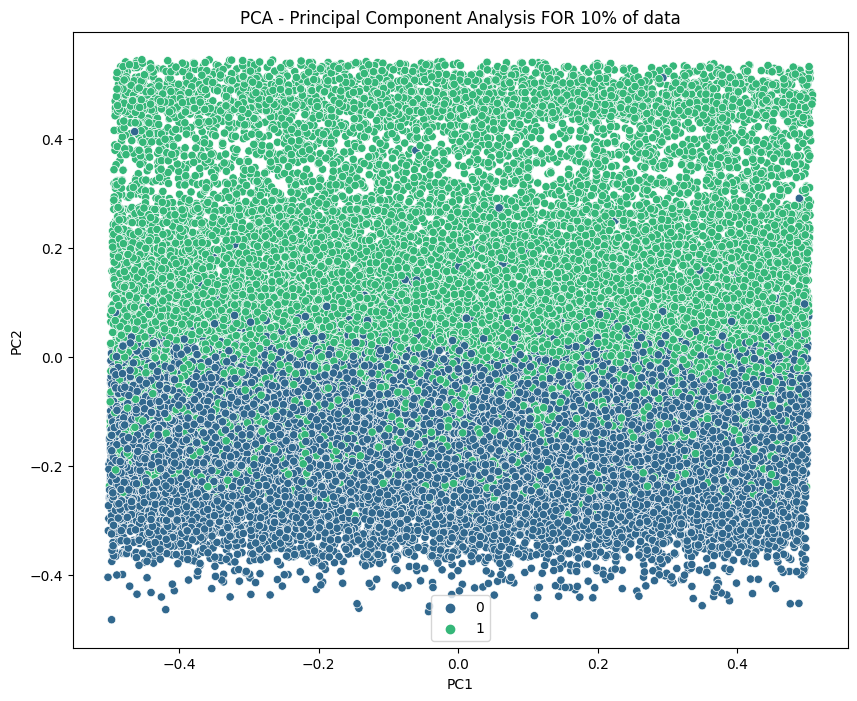

In [ ]:
#PCA - Principal Component Analysis
pca = PCA(n_components=2)
pca_result = pca.fit_transform(input_X)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue=input_y.values.flatten(), data=pca_df, palette='viridis')
plt.title("PCA - Principal Component Analysis FOR 10% of data")
plt.show()

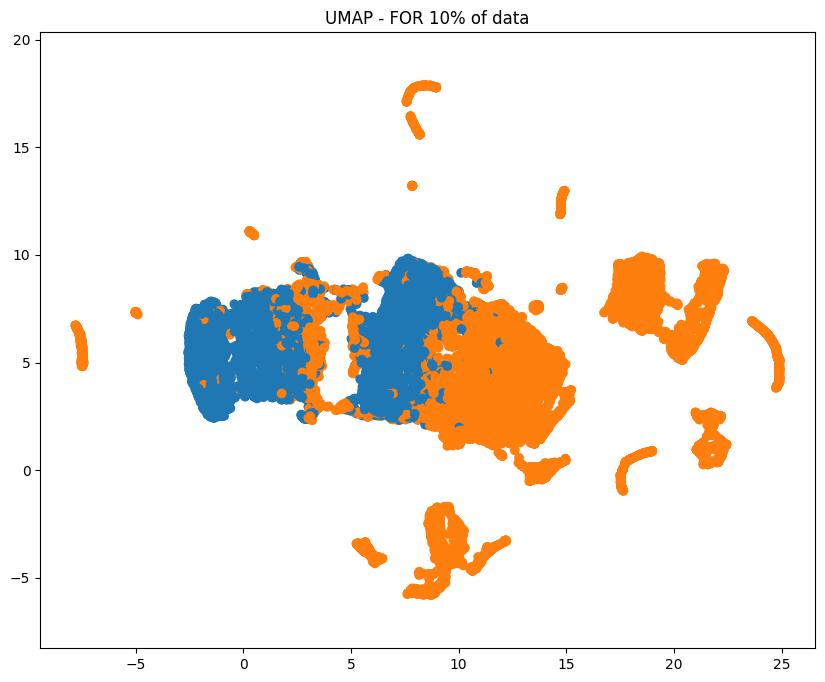

In [ ]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(input_X)
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in input_y.Class.map({0:0, 1:1})])
plt.title("UMAP - FOR 10% of data")
plt.gca().set_aspect('equal', 'datalim')

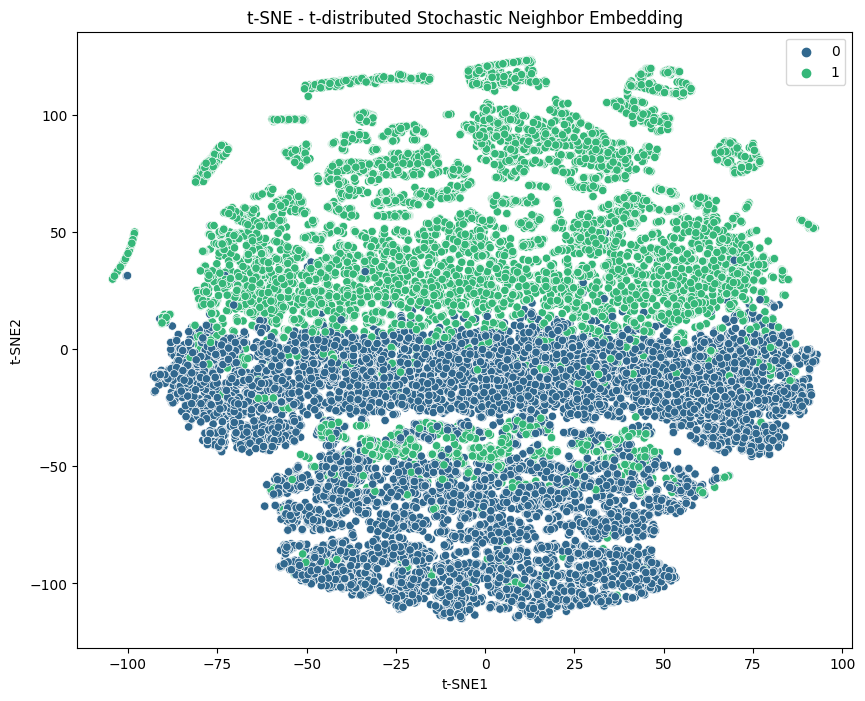

In [ ]:
#  t-SNE - t-distributed Stochastic Neighbor Embedding
tsne_model = TSNE(n_components=2)
tsne_result = tsne_model.fit_transform(input_X)
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue=input_y.values.flatten(), data=tsne_df, palette='viridis')
plt.title("t-SNE - t-distributed Stochastic Neighbor Embedding")
plt.show()

Neural network

log loss(binary cross entropy) is used for loss function

L2 regularization term is divided by the sample size when added to the loss.

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Try with 5% of train set

In [ ]:
small_X = X_train[:math.ceil(len(X_train)*0.05)]
small_y = y_train[:math.ceil(len(X_train)*0.05)]
small_X.shape

(17059, 25)

In [ ]:
clf_nn = MLPClassifier(hidden_layer_sizes=2, activation='relu', solver='sgd',
                       batch_size=50, learning_rate_init=0.01, max_iter = 200,
                       validation_fraction = 0.25, early_stopping=True).fit(small_X, np.ravel(small_y))

In [ ]:
clf_nn.score(X_val, y_val)

0.9507324622337899

Test on test set

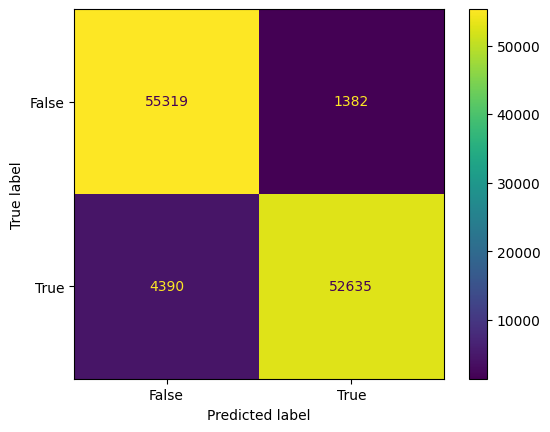

In [ ]:
confusion_matrix2 = confusion_matrix(y_test, clf_nn.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

Use grid search to get optimal hyperparameter such as

Hidden_layer_sizes,

Activation,

Batch_size,

Learning_rate_init,

Max_iter

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(3, 32), (5, 32)],
    'activation':['relu', 'identity'],
    'batch_size':[200, 300],
    'learning_rate_init':[0.01, 0.005],
    'max_iter':[200, 300]
    }

In [ ]:
clf_nn_param = MLPClassifier(solver='sgd', validation_fraction = 0.25, early_stopping=True, random_state=rng)
grid_search = GridSearchCV(estimator=clf_nn_param, param_grid=param_grid)
grid_search.fit(small_X, np.ravel(small_y))

best_params = grid_search.best_params_
print(best_params)

{'activation': 'identity', 'batch_size': 200, 'hidden_layer_sizes': (3, 32), 'learning_rate_init': 0.01, 'max_iter': 200}


Evaluate tuned hyperparameters in validation sets

In [ ]:
clf_nn2 = MLPClassifier(hidden_layer_sizes=(5, 32), activation='identity', solver='sgd',
                        batch_size=200, learning_rate_init=0.01, max_iter = 200,
                        validation_fraction = 0.25, early_stopping=True).fit(small_X, np.ravel(small_y))

In [ ]:
clf_nn2.score(X_val, y_val)

0.9497388459982765

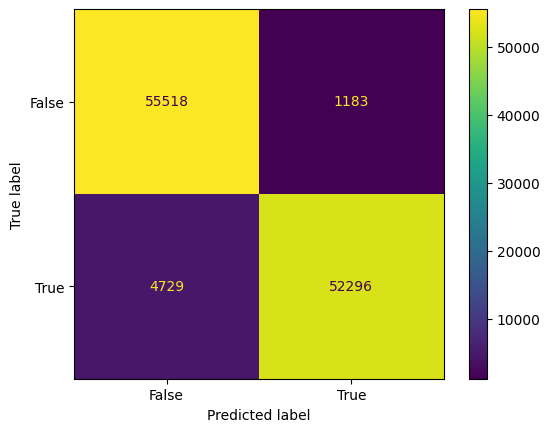

In [ ]:
confusion_matrix2 = confusion_matrix(y_test, clf_nn2.predict(X_test))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix2, display_labels = [False, True])

cm_display.plot()
plt.show()
#https://www.w3schools.com/python/python_ml_confusion_matrix.asp

Got increased accuracy.

Check with other small datasets whether tuned hyperparameters overfitted this specific small dataset

In [ ]:
losses = []
accuracys = []
for i in range(20):
    set_size = math.ceil(len(X_train)*0.05)
    grid_X = X_train[set_size*i:set_size*(i+1)]
    grid_y = y_train[set_size*i:set_size*(i+1)]
    clf_nn2 = MLPClassifier(hidden_layer_sizes=(5, 32), activation='relu', solver='sgd',
                            batch_size=200, learning_rate_init=0.01, max_iter = 300,
                            validation_fraction = 0.25, early_stopping=True).fit(input_X, np.ravel(input_y))
    score = clf_nn2.score(X_val, y_val)
    print(f"set{i+1} accuracy: {np.round(score, 4)}")
    losses.append(clf_nn2.loss_curve_)
    accuracys.append(clf_nn2.validation_scores_)

set1 accuracy: 0.9495
set2 accuracy: 0.9509
set3 accuracy: 0.9516
set4 accuracy: 0.9519
set5 accuracy: 0.9504
set6 accuracy: 0.9516
set7 accuracy: 0.9516
set8 accuracy: 0.4996
set9 accuracy: 0.9515
set10 accuracy: 0.9514
set11 accuracy: 0.952
set12 accuracy: 0.9518
set13 accuracy: 0.9518
set14 accuracy: 0.9511
set15 accuracy: 0.9513
set16 accuracy: 0.9574
set17 accuracy: 0.9501
set18 accuracy: 0.9547
set19 accuracy: 0.9511
set20 accuracy: 0.9508


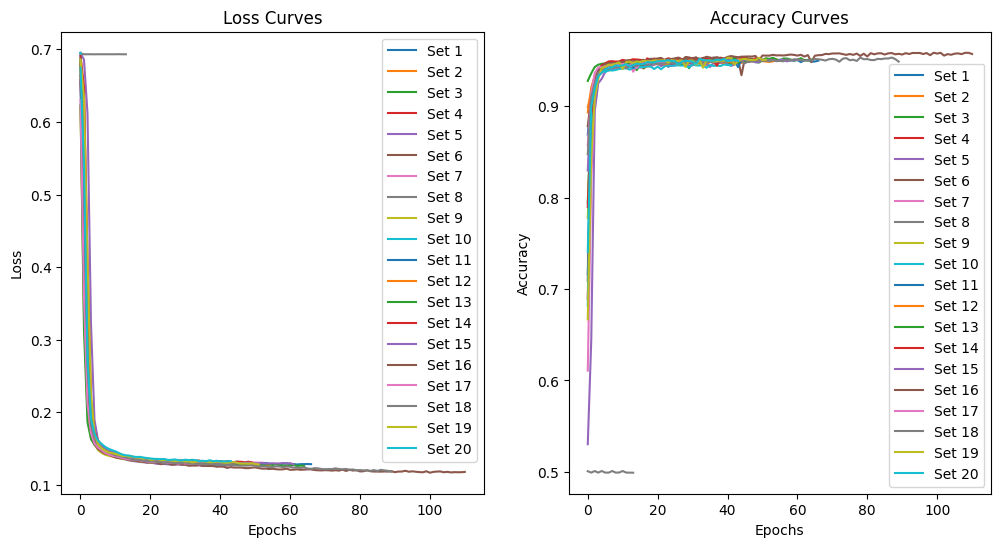

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for i, loss_curve in enumerate(losses):
    plt.plot(loss_curve, label=f'Set {i + 1}')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
for i, accuracy_curve in enumerate(accuracys):
    plt.plot(accuracy_curve, label=f'Set {i + 1}')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Accuracy and loss seems to be consistent for most sets. However one of the small set got extremely low accuracy, high loss.

We thought this may be due to small batch size which might have include only one type of target

Therefore, we tried increasing batch size to 400 with 5 fold with whole training, validation dataset.

In [ ]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 32), activation='identity', solver='sgd',
                      batch_size=400, learning_rate_init=0.01, max_iter=200,
                      validation_fraction=0.25, early_stopping=True)

# Create a 5-fold cross-validation object
kf = KFold(n_splits=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf_nn, X_train, np.ravel(y_train), cv=kf, scoring='accuracy')

# Display the cross-validation scores
print("Cross-validation scores:", np.round(cv_scores, 4))
print("Mean accuracy:", np.round(np.mean(cv_scores), 4))

Cross-validation scores: [0.9513 0.9505 0.9525 0.951  0.9501]
Mean accuracy: 0.9511


Pitfall 1: Try in more complex model

Since there were limits using sklearn neural network model, we tried tenserflow for more complex model

Adding more neurons

Adding dropout rate set to 0.2

Using larger batch size

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=210, input_shape=(X_train.shape[1],), activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(110, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])
#, kernel_regularizer=regularizers.l2(0.01)

In [ ]:
sgd_optimizer = SGD(learning_rate=0.01)

model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss',
                               patience=2,
                               restore_best_weights=True)

In [ ]:
model.fit(X_train, np.ravel(y_train), batch_size=400, epochs=300, validation_data=(X_val, np.ravel(y_val)), callbacks=[early_stopping])

Epoch 1/300
853/853 [==============================] - 12s 14ms/step - loss: 0.1361 - accuracy: 0.9484 - val_loss: 0.1307 - val_accuracy: 0.9509
Epoch 2/300
853/853 [==============================] - 9s 10ms/step - loss: 0.1356 - accuracy: 0.9484 - val_loss: 0.1295 - val_accuracy: 0.9501
Epoch 3/300
853/853 [==============================] - 16s 18ms/step - loss: 0.1354 - accuracy: 0.9484 - val_loss: 0.1294 - val_accuracy: 0.9507
Epoch 4/300
853/853 [==============================] - 17s 20ms/step - loss: 0.1352 - accuracy: 0.9488 - val_loss: 0.1294 - val_accuracy: 0.9504
Epoch 5/300
853/853 [==============================] - 16s 19ms/step - loss: 0.1347 - accuracy: 0.9488 - val_loss: 0.1292 - val_accuracy: 0.9510
Epoch 6/300
853/853 [==============================] - 10s 12ms/step - loss: 0.1345 - accuracy: 0.9489 - val_loss: 0.1316 - val_accuracy: 0.9512
Epoch 7/300
853/853 [==============================] - 10s 12ms/step - loss: 0.1343 - accuracy: 0.9491 - val_loss: 0.1312 - val_acc

In [ ]:
predictions = model.predict(X_test)

3554/3554 [==============================] - 7s 2ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.99%


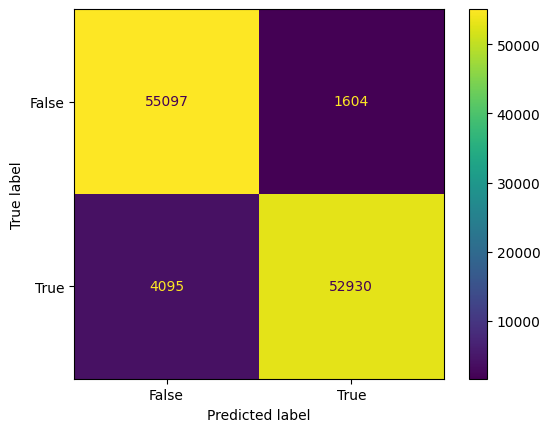

In [ ]:
confusion_mat = confusion_matrix(y_test, predicted_labels)
confusion_matrix3 = confusion_matrix(y_test, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()

Pitfall 2:Runtime -> try reducing feature



In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=rng)
rf_classifier.fit(X_train, np.ravel(y_train))
feature_importances = rf_classifier.feature_importances_

Feature Importance:
   Feature  Importance
3       V4    0.181609
10     V12    0.172246
13     V16    0.129987
9      V11    0.098806
2       V3    0.096133
6       V7    0.064109
1       V2    0.046070
8       V9    0.030664
16     V21    0.021541
0       V1    0.018563
5       V6    0.017471
22     V27    0.016936
4       V5    0.012475
7       V8    0.011545
14     V19    0.010854
23     V28    0.010242
15     V20    0.009335
11     V13    0.008836
18     V23    0.007955
19     V24    0.007871
20     V25    0.007601
12     V15    0.006904
17     V22    0.006143
21     V26    0.005977
24  Amount    0.000128


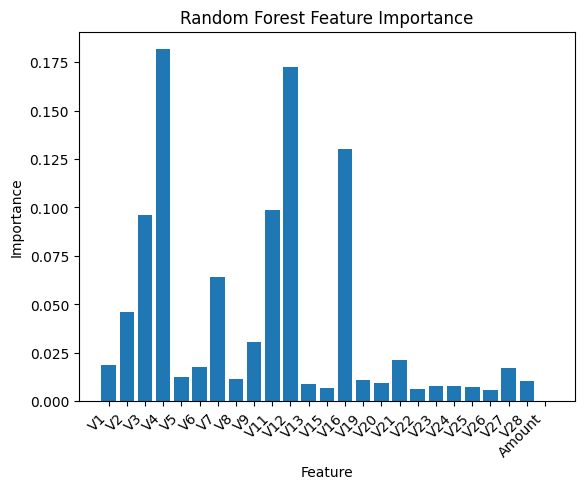

In [ ]:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

plt.bar(range(X_train.shape[1]), feature_importances)
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()

In [ ]:
high_importance = feature_importance_df[feature_importance_df['Importance'] > 0.01]

In [ ]:
selected_features = high_importance['Feature'].tolist()
X_selected = X_train[selected_features]

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=210, input_shape=(X_selected.shape[1],), activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(150, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(110, activation='linear'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])

In [ ]:
sgd_optimizer = SGD(learning_rate=0.01)

model2.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='loss',
                               patience=2,
                               restore_best_weights=True)

In [ ]:
model2.fit(X_selected, np.ravel(y_train), batch_size=400, epochs=300, validation_data=(X_val[selected_features], np.ravel(y_val)), callbacks=[early_stopping])

Epoch 1/300
853/853 [==============================] - 16s 17ms/step - loss: 0.3725 - accuracy: 0.8493 - val_loss: 0.2000 - val_accuracy: 0.9255
Epoch 2/300
853/853 [==============================] - 12s 13ms/step - loss: 0.1845 - accuracy: 0.9335 - val_loss: 0.1558 - val_accuracy: 0.9447
Epoch 3/300
853/853 [==============================] - 9s 10ms/step - loss: 0.1595 - accuracy: 0.9423 - val_loss: 0.1470 - val_accuracy: 0.9458
Epoch 4/300
853/853 [==============================] - 10s 12ms/step - loss: 0.1519 - accuracy: 0.9443 - val_loss: 0.1434 - val_accuracy: 0.9452
Epoch 5/300
853/853 [==============================] - 10s 12ms/step - loss: 0.1482 - accuracy: 0.9449 - val_loss: 0.1405 - val_accuracy: 0.9465
Epoch 6/300
853/853 [==============================] - 8s 10ms/step - loss: 0.1455 - accuracy: 0.9454 - val_loss: 0.1389 - val_accuracy: 0.9466
Epoch 7/300
853/853 [==============================] - 10s 12ms/step - loss: 0.1439 - accuracy: 0.9459 - val_loss: 0.1391 - val_accu

In [ ]:
predictions = model.predict(X_test[selected_features])

3554/3554 [==============================] - 6s 2ms/step


In [ ]:
predicted_labels = (predictions > 0.5).astype(int)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = accuracy_score(y_test, predicted_labels)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 94.29%


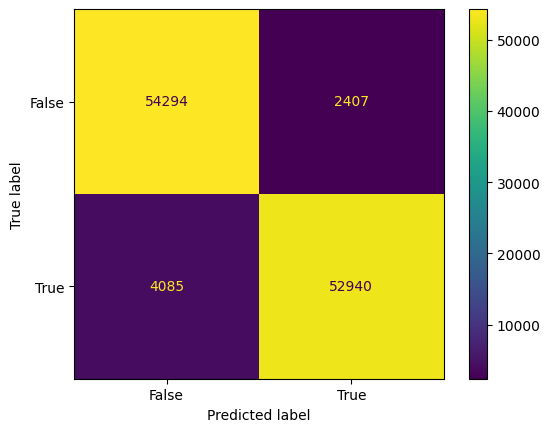

In [ ]:
confusion_mat = confusion_matrix(y_test, predicted_labels)
confusion_matrix3 = confusion_matrix(y_test, predicted_labels)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix3, display_labels = [False, True])

cm_display.plot()
plt.show()